In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [32]:
np.random.seed(10)
P, Q = (np.random.rand(i, 2) for i in (4, 5))
P_big, Q_big = (np.random.rand(i, 80) for i in (100, 120))

print(P, "\n\n", Q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [33]:
def calculate_distance(a, b):
    """
    Find a pairwise distance between two points

    Args:
        a: numpy array of shape=(1, 2)
        b: numpy array of shape=(1, 2)
    Returns:
        d: numpy array of shape=(1, 2)
    
    >>> calculate_distance(np.array([1, 1]), np.array([10, 5]))
    9.848857801796104
    """
    difference = np.diff([a, b], axis=0)
    difference_squared = np.power(difference, 2)
    difference_squared_summed = np.sum(difference_squared)
    d = np.sqrt(difference_squared_summed)
    return d

assert calculate_distance(np.array([1, 1]), np.array([10, 5])) == 9.848857801796104, "distance test failed"

In [34]:
def naive(P, Q):
    """
    A naive solution for finding pairvise distances between poins in P and Q
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    distances = list()
    for point_p in P:
        p_distances = list()
        for point_q in Q:
            p_distances.append(calculate_distance(point_p, point_q))
        distances.append(p_distances)

    D = np.array(distances)
    return D
            
test(naive)

✅ Your `naive` passed 1 tests.


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [35]:
rows, cols = np.indices((1, 3))
rows, cols

(array([[0, 0, 0]]), array([[0, 1, 2]]))

In [36]:
rows, cols = np.indices((P.shape[0], Q.shape[0]))
print(rows, end="\n\n")
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [37]:
rows.ravel()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [38]:
cols.ravel()

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [39]:
print(P[rows.ravel()], end="\n\n")
print(Q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [40]:
calculate_distance(P[0], Q[0])

0.6059907348804273

In [41]:
t = np.vectorize(calculate_distance, signature="(m, n), (m, n) -> ()") # or some other "functional" numpy function
assert t([[1, 2]], [[3, 4]]) == calculate_distance([1, 2], [3, 4]), "Wrong vectorization"


In [42]:
calculate_distance(P[0], Q[1])

0.9365944898987211

In [43]:
P[0]

array([0.77132064, 0.02075195])

In [44]:
P[rows.ravel()][0]

array([0.77132064, 0.02075195])

In [45]:
t = np.vectorize(calculate_distance, signature="(n), (n) -> ()")
t(P[rows.ravel()], Q[cols.ravel()])

array([0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751,
       0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491,
       0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825,
       0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376])

In [46]:
shape_x, shape_y = P.shape[0], Q.shape[0]
rows, cols = np.indices([shape_x, shape_y])
data_p, data_q = P[rows.ravel()], Q[cols.ravel()]
vectorized_calculate_distance = np.vectorize(calculate_distance, signature="(n), (n) -> ()")
vectorized_calculate_distance(data_p, data_q).reshape(shape_x, shape_y)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [47]:
list(zip(P[rows.ravel()], Q[cols.ravel()]))

[(array([0.77132064, 0.02075195]), array([0.16911084, 0.08833981])),
 (array([0.77132064, 0.02075195]), array([0.68535982, 0.95339335])),
 (array([0.77132064, 0.02075195]), array([0.00394827, 0.51219226])),
 (array([0.77132064, 0.02075195]), array([0.81262096, 0.61252607])),
 (array([0.77132064, 0.02075195]), array([0.72175532, 0.29187607])),
 (array([0.63364823, 0.74880388]), array([0.16911084, 0.08833981])),
 (array([0.63364823, 0.74880388]), array([0.68535982, 0.95339335])),
 (array([0.63364823, 0.74880388]), array([0.00394827, 0.51219226])),
 (array([0.63364823, 0.74880388]), array([0.81262096, 0.61252607])),
 (array([0.63364823, 0.74880388]), array([0.72175532, 0.29187607])),
 (array([0.49850701, 0.22479665]), array([0.16911084, 0.08833981])),
 (array([0.49850701, 0.22479665]), array([0.68535982, 0.95339335])),
 (array([0.49850701, 0.22479665]), array([0.00394827, 0.51219226])),
 (array([0.49850701, 0.22479665]), array([0.81262096, 0.61252607])),
 (array([0.49850701, 0.22479665]),

In [48]:
def with_indices(P, Q):
    """
    An optimized solution using matching indices
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    shape_x, shape_y = P.shape[0], Q.shape[0]
    rows, cols = np.indices([shape_x, shape_y])
    data_p, data_q = P[rows.ravel()], Q[cols.ravel()]
    vectorized_calculate_distance = np.vectorize(calculate_distance, signature="(n), (n) -> ()")
    D = vectorized_calculate_distance(data_p, data_q).reshape(shape_x, shape_y)

    return D
    

test(with_indices)

✅ Your `with_indices` passed 1 tests.


In [49]:
# better approach
def with_indices(P, Q):
    """
    An optimized solution using matching indices
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    shape_x, shape_y = P.shape[0], Q.shape[0]
    rows, cols = np.indices([shape_x, shape_y])
    data_p, data_q = P[rows.ravel()], Q[cols.ravel()]
    D = np.sqrt(np.sum((data_p - data_q)**2, axis=1))
    return D.reshape(shape_x, shape_y)
    

test(with_indices)

✅ Your `with_indices` passed 1 tests.


In [50]:
P[rows.ravel()].shape, P[rows.ravel(), :].shape

((20, 2), (20, 2))

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [51]:
from scipy.spatial.distance import cdist


def scipy_version(P, Q):
    return cdist(P, Q)

### Numpy Magic

In [52]:
def tensor_broadcasting(P, Q):
    return np.sqrt(np.sum((P[:, np.newaxis, :] - Q[np.newaxis, :, :]) ** 2, axis=2))

In [53]:
P

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071]])

In [54]:
P[:, None, :]

array([[[0.77132064, 0.02075195]],

       [[0.63364823, 0.74880388]],

       [[0.49850701, 0.22479665]],

       [[0.19806286, 0.76053071]]])

In [55]:
Q

array([[0.16911084, 0.08833981],
       [0.68535982, 0.95339335],
       [0.00394827, 0.51219226],
       [0.81262096, 0.61252607],
       [0.72175532, 0.29187607]])

In [56]:
Q[None, :, :]

array([[[0.16911084, 0.08833981],
        [0.68535982, 0.95339335],
        [0.00394827, 0.51219226],
        [0.81262096, 0.61252607],
        [0.72175532, 0.29187607]]])

# Compare methods

In [57]:
methods = [
    naive,
    # naive_2,
    with_indices,
    # with_indices_2,
    scipy_version,
    tensor_broadcasting,
]
timers = []
for f in methods:
    r = %timeit -o f(P_big, Q_big)
    timers.append(r)

58.9 ms ± 705 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.36 ms ± 72.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
230 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.23 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


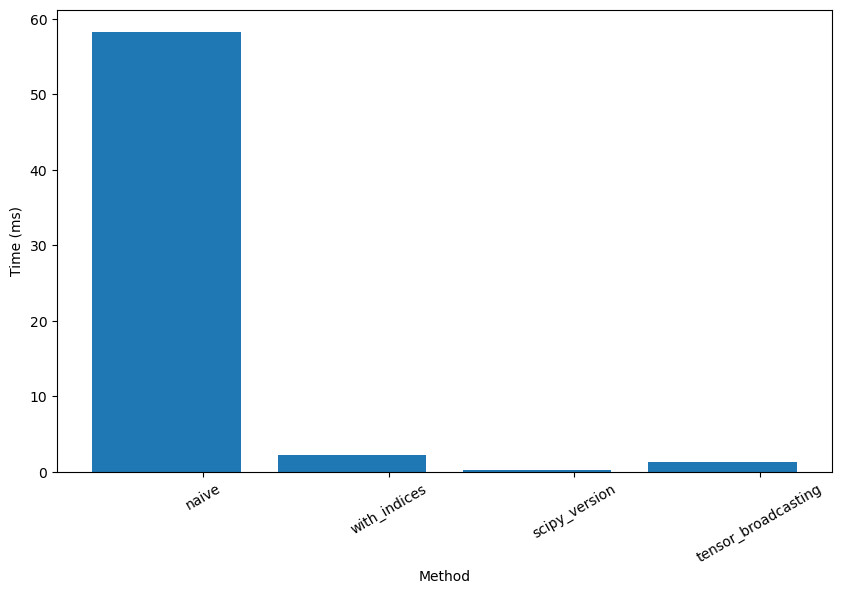

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(len(methods)), [r.best * 1000 for r in timers], log=False
)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods)) + 0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel("Method")
plt.ylabel("Time (ms)")
plt.show()